In [1]:
!pip install wordcloud #주피터에서 터미널 사용법

  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=161114 sha256=e3b70ac4df77710887a2478041706b4f389c18975080c435eb32d24727f4e5b5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


In [3]:
import nltk #자연어처리 관련 패키지
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') #불용어 등들을 다운로드

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [19]:
import pandas as pd
import glob #파일 처리 모듈
import re #정규표현식 임포트
from functools import reduce #2차원 리스트 -> 1차원 리스트
from nltk.tokenize import word_tokenize #토큰화
from nltk.corpus import stopwords #불용어
from nltk.stem import WordNetLemmatizer #표제어 추출
from collections import Counter #카운터
import matplotlib.pyplot as plt
#주피터 노트북은 이거해주면 오류 없음
%matplotlib inline
from wordcloud import STOPWORDS, WordCloud #워드 클라우드

all_files = glob.glob('../../textAnalyzing/myCabinetExcelData*.xls')
all_files_data = []
for file in all_files:
    _df = pd.read_excel(file)
    all_files_data.append(_df) #배열에 다 넣어줌
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index=True) #axis=0이면 행방향(밑)으로 데이터 추가
all_title = all_files_data_concat['제목']

stopWords = set(stopwords.words('english')) #불용어 저장
lemma = WordNetLemmatizer() #표제어 추출 객체

words = [] 
for title in all_title: #워드 토큰화 -> 불용어 제거 -> 표제어 변환
    EnWords= re.sub(r"[^a-zA-Z]+", " ", str(title)) #영어가 아니면 공백 처리
    EnWordsToken= word_tokenize(EnWords.lower()) #lower후 토큰화
    EnWordsTokenStop= [w for w in EnWordsToken if w not in stopWords] #리스트 함축, 
    EnWordsTokenStopLemma= [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)
print(words[0])

['architecting', 'time', 'critical', 'big', 'data', 'system']


In [21]:
words2 = list(reduce(lambda x, y: x+y, words))
count = Counter(words2) #Count 객체 생성
word_count= {}
for tag, counts in count.most_common(50): #최빈 50개
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1221
big : 1120
analytics : 100
based : 95
analysis : 91
approach : 60
system : 58
using : 57
driven : 52
challenge : 47
learning : 46
new : 45
application : 39
health : 36
issue : 35
framework : 35
research : 34
model : 34
science : 33
management : 33
era : 31
opportunity : 30
cloud : 30
special : 27
machine : 26
network : 25
platform : 25
processing : 24
smart : 24
algorithm : 24
time : 23
perspective : 23
technology : 22
mining : 22
distributed : 22
computing : 22
world : 22
study : 21
paper : 21
business : 21
information : 21
future : 21
method : 20
china : 20
intelligence : 20
performance : 20
process : 20
call : 19
use : 19
efficient : 19


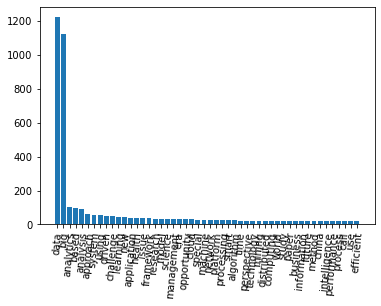

In [24]:
sorted_Keys= sorted(word_count, key = word_count.get, reverse = True) #.get은 dic의 value 따라서 key를 value기준으로 정렬
sorted_Values= sorted(word_count.values(), reverse = True) #이 번에는 value를 정렬
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [25]:
all_files_data_concat['doc_count'] = 0
summary_year= all_files_data_concat.groupby('출판일', as_index= False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1999,2
1,2003,1
2,2004,2
3,2011,5
4,2012,20
5,2013,52
6,2014,146
7,2015,105
8,2016,134
9,2017,149


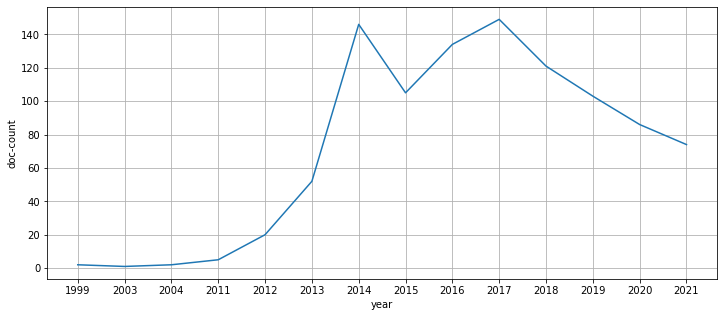

In [26]:
plt.figure(figsize= (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

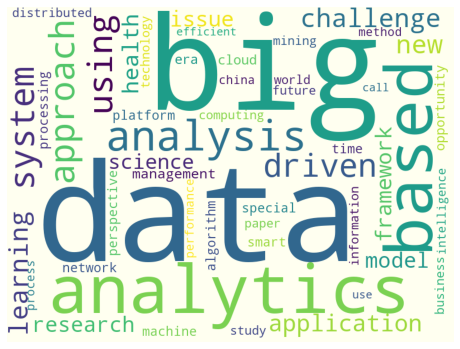

In [32]:
stopwords= set(STOPWORDS)
wc= WordCloud(background_color= 'ivory', stopwords= stopwords, width = 800, height = 600) #WordCloud객체 생성
cloud = wc.generate_from_frequencies(word_count) #wc의 카운트값 넣어서 이미지 생성
plt.figure(figsize= (8,8))
plt.imshow(cloud) #이미지 넣기
plt.axis('off')
plt.show()